In [7]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False


In [8]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled= train_input/255.0

In [9]:
train_scaled,val_scaled,train_target,val_target=train_test_split(
train_scaled,train_target,test_size=0.2, random_state=42)

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))   #sigmoid
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [11]:
checkpoint_cd = keras.callbacks.ModelCheckpoint('best_model.keras')
#compile 종료
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#조기종료
# patience=2 손실값이 2이면 종료해줘라
# restore_best_weights=True 뒤로 빽 해서 가장 좋은 모델을 저장시켜줌
early_stoping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cd,early_stoping_cb])


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7269 - loss: 0.7833 - val_accuracy: 0.8282 - val_loss: 0.4605
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8351 - loss: 0.4563 - val_accuracy: 0.8522 - val_loss: 0.3987
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8499 - loss: 0.4190 - val_accuracy: 0.8618 - val_loss: 0.3716
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8567 - loss: 0.3931 - val_accuracy: 0.8680 - val_loss: 0.3590
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8624 - loss: 0.3748 - val_accuracy: 0.8727 - val_loss: 0.3494
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8669 - loss: 0.3650 - val_accuracy: 0.8747 - val_loss: 0.3526
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8729 - loss: 0.3537 - val_accuracy: 0.8767 - val_loss: 0.3361
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8749 - loss: 0.3355 - 

Text(0, 0.5, 'loss')

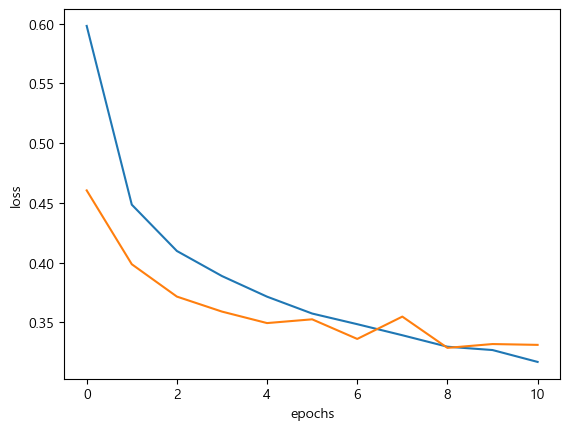

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')